In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
gc.enable()

In [2]:
problem_name = "dectiger"
planning_horizon = 5
gametype = "stackelberg"
sota = False
num_iterations = 2

PROBLEM.initialize(DecPOMDP(problem_name,horizon=planning_horizon))
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
problem = PROBLEM.get_instance()
print(f"State size = {len(problem.STATES)}")
print(problem.JOINT_ACTIONS)
print(problem.JOINT_OBSERVATIONS)
# for type,matrix in problem.REWARDS.items():
#     print(type)
#     print(f"leader :\n{matrix[0]}\nfollower : \n{matrix[1]}")


State size = 2
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3]


In [4]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations)
# experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


In [5]:
experiment.run_experiments(0.01)

			 Solving cooperative dectiger GAME Horizon 1 WITH SOTA = False  
iteration : 1
	belief expansion done with density = 0.01 , resulting belief space size = 2


========== Backup at timestep 0 ==========


		belief id : 0 - 1 / 1 



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

iteration : 2
	belief expansion done with density = 0.01 , resulting belief space size = 2


========== Backup at timestep 0 ==========
		belief id : 0 - 1 / 1 



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  9.0 , follower = [9. 9.]

			 Solving cooperative dectiger GAME Horizon 2 WITH SOTA = False  
iteration : 1
	belief expansion done with density = 0.01 , resulting belief space size = 4


========== Backup at timestep 1 ==========
		belief id : 0 - 1 / 3 
		belief id : 1 - 2 / 3 
		belief id : 2 - 3 / 3 

========== Backup at timestep 0 ==========

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,leader values,follower values,density
0,cooperative,Stackelberg,1,2,"[0.10898995399475098, 0.023681163787841797]",2,"[9.0, 9.0]","[[9.0, 9.0], [9.0, 9.0]]",0.01
1,cooperative,Stackelberg,2,2,"[0.06532907485961914, 0.11604809761047363]",4,"[18.0, 18.0]","[[18.0, 18.0], [18.0, 18.0]]",0.01
2,cooperative,Stackelberg,3,2,"[0.1660318374633789, 0.14753508567810059]",6,"[27.0, 27.0]","[[27.0, 27.0], [27.0, 27.0]]",0.01
3,cooperative,Stackelberg,4,2,"[0.2531418800354004, 0.2543330192565918]",6,"[36.0, 36.0]","[[36.0, 36.0], [36.0, 36.0]]",0.01
4,cooperative,Stackelberg,5,2,"[0.45375514030456543, 0.367002010345459]",6,"[45.0, 45.0]","[[45.0, 45.0], [45.0, 45.0]]",0.01
5,cooperative,State of the Art,1,2,"[0.00015282630920410156, 0.00012612342834472656]",2,"[9.0, 9.0]","[[9.0, 9.0], [9.0, 9.0]]",0.01
6,cooperative,State of the Art,2,2,"[0.002710103988647461, 0.002505779266357422]",4,"[18.0, 18.0]","[[9.0, 9.0], [9.0, 9.0]]",0.01
7,cooperative,State of the Art,3,2,"[0.007411003112792969, 0.006743192672729492]",6,"[27.0, 27.0]","[[9.0, 9.0], [9.0, 9.0]]",0.01
8,cooperative,State of the Art,4,2,"[0.015331268310546875, 0.01579904556274414]",6,"[36.0, 36.0]","[[9.0, 9.0], [9.0, 9.0]]",0.01
9,cooperative,State of the Art,5,2,"[0.021785974502563477, 0.021503210067749023]",6,"[45.0, 45.0]","[[9.0, 9.0], [9.0, 9.0]]",0.01


In [6]:
experiment.comparison_matrix

,Strong Leader,Weak Leader
Strong Follower,"(25.456872624133304, -41.20094433204346)","[-662.7849770970802, -724.6005372804274]"
Blind Follower,"[-662.7849770970802, -724.6005372804274]","(25.223234320252402, -13.5)"


In [7]:
tables = experiment.generate_summary_table()
tables["zerosum"]

State of the Art                        Stackelberg               \
                        time leader value iteration        time leader value   
dectiger(1)         0.023534        -75.0         2    0.017966        -75.0   
dectiger(2)         0.084662       -150.0         2    0.082015       -150.0   
dectiger(3)         0.197422       -225.0         2    0.218603       -225.0   
dectiger(4)         0.294650       -300.0         2    0.454178       -300.0   
dectiger(5)         0.416978       -375.0         2    0.456583       -375.0   

                       
            iteration  
dectiger(1)         2  
dectiger(2)         2  
dectiger(3)         2  
dectiger(4)         2  
dectiger(5)         2

In [8]:
experiment.generate_comparison_tables()

cooperative                           \
            State of the Art Leader Value Stackelberg Leader Value   
dectiger(1)                           9.0                      9.0   
dectiger(2)                          18.0                     18.0   
dectiger(3)                          27.0                     27.0   
dectiger(4)                          36.0                     36.0   
dectiger(5)                          45.0                     45.0   

                                  zerosum                           \
            State of the Art Leader Value Stackelberg Leader Value   
dectiger(1)                         -75.0                    -75.0   
dectiger(2)                        -150.0                   -150.0   
dectiger(3)                        -225.0                   -225.0   
dectiger(4)                        -300.0                   -300.0   
dectiger(5)                        -375.0                   -375.0   

                              general-sum                           
            State of the Art Leader Value Stackelberg Leader Value  
dectiger(1)                      3.500000                 3.500000  
dectiger(2)                     10.486484                10.486484  
dectiger(3)                     14.860660                14.710069  
dectiger(4)                     21.270415                21.054800  
dectiger(5)                     25.456873                25.223234

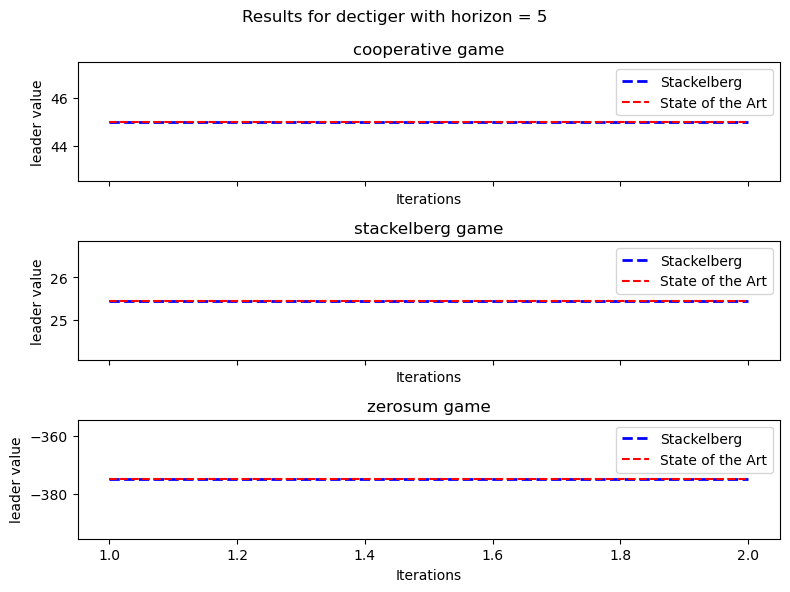

In [9]:
experiment.plots()

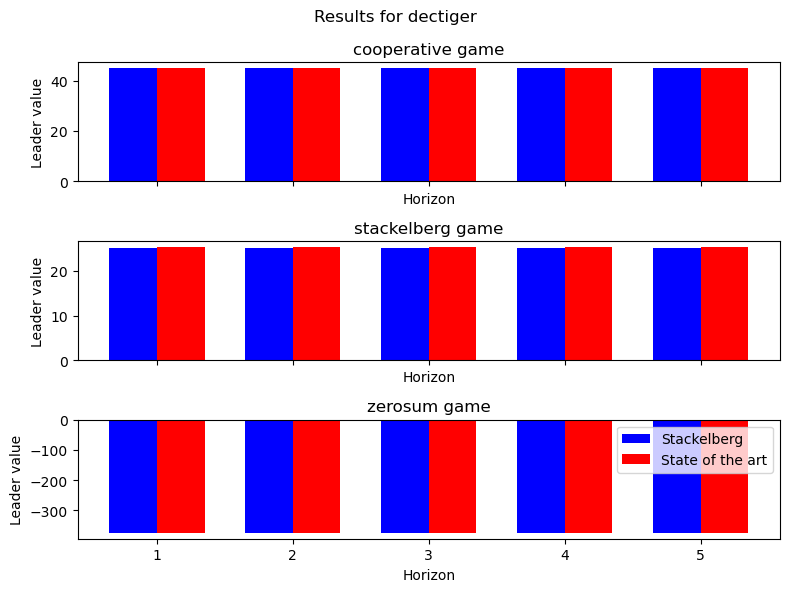

In [10]:
experiment.horizon_value_plot()